In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/home/rgukt/Documents/Titanic-Dataset.csv')
# Check for missing values
print(df.isnull().sum())

df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

print(df)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
# Convert 'Sex' into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [13]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [7]:
print(df.describe())

         Survived      Pclass  Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  0.0  891.000000  891.000000  891.000000   
mean     0.383838    2.308642  NaN   29.361582    0.523008    0.381594   
std      0.486592    0.836071  NaN   13.019697    1.102743    0.806057   
min      0.000000    1.000000  NaN    0.420000    0.000000    0.000000   
25%      0.000000    2.000000  NaN   22.000000    0.000000    0.000000   
50%      0.000000    3.000000  NaN   28.000000    0.000000    0.000000   
75%      1.000000    3.000000  NaN   35.000000    1.000000    0.000000   
max      1.000000    3.000000  NaN   80.000000    8.000000    6.000000   

             Fare  
count  891.000000  
mean    32.204208  
std     49.693429  
min      0.000000  
25%      7.910400  
50%     14.454200  
75%     31.000000  
max    512.329200  


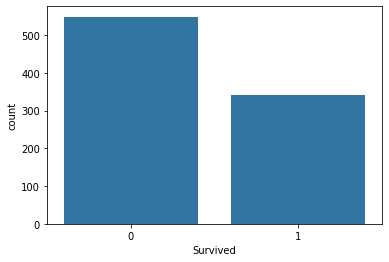

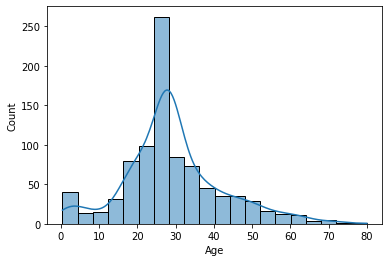

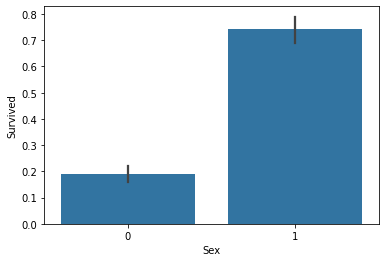

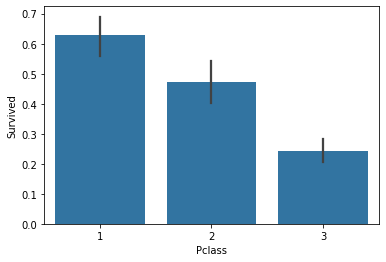

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival count
sns.countplot(x='Survived', data=df)
plt.show()

# Plot age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.show()

# Plot survival rate by sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Plot survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

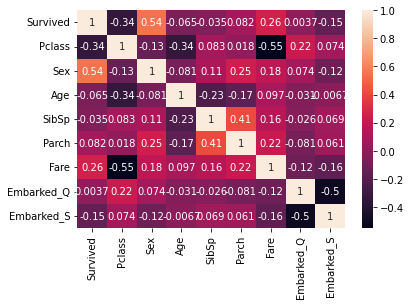

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()